## Importing the libraries

In [159]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression,LinearRegression, Ridge, SGDRegressor,Lasso
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
import math
from sklearn.preprocessing import PolynomialFeatures

## Importing Dataset and visulize it

In [160]:
df = pd.read_csv('FINAL_CLEAN2.csv')
df= df.loc[:,~df.columns.str.contains('^Unnamed: 0')]
df.head()

,year,tabaghat,parking,anbari,metrag,price,source,asansor,room,floor,lat,vahed,long,shomali,date
0,1396.0,4,0,0,40,38750000,iranfile,0,1,3.0,36.47018,4.0,52.60150,0.0,1401/09/10
1,1391.0,5,1,0,80,45625000,iranfile,1,2,3.0,31.17727,5.0,44.96124,0.0,1401/09/10
2,1387.0,4,0,1,62,25000000,iranfile,0,2,4.0,36.47018,4.0,52.60150,0.0,1401/09/10
3,1381.0,2,0,0,43,32558000,iranfile,0,1,1.0,36.95833,2.0,53.25000,1.0,1401/09/10
4,1400.0,4,0,0,50,37400000,iranfile,1,1,3.0,36.47018,4.0,52.60150,0.0,1401/09/10


In [161]:
df=df.drop(['source','date'],axis=1)

In [162]:
df["price"] = df["price"].str.replace(',', '')

In [163]:
df['floor'].unique()

array(['3.0', '4.0', '1.0', '2.0', nan, '0.0', '9.0', '5.0', '6.0', '8.0',
       '7.0', '10.0', '11.0', '13.0', '20.0', '19.0', '12.0', '-2.0',
       '17.0', '15.0', '24.0', '14.0', '18.0', '21.0', '16.0', '22.0',
       '-1.0', '6', '1', '4', '5', '11', '2', '8', '3', '12', '16', '1۰',
       '24', '7', '2۰', '9', '30', '18', '25', '14', '+3', '3۰', '22',
       '26', '13', '17', '29', '21', '15', '28', '19', '23', '20', '27',
       '27.0', '25.0', '31.0', '30.0'], dtype=object)

In [164]:
df['tabaghat']= df['tabaghat'].str.replace('---', 'nan')

In [165]:
df['tabaghat'].unique()

array(['4', '5', '2', '9', '12', '7', '6', '1', '3', '14', 'nan', '15',
       '8', '18', '10', '11', '24', '17', '21', '20', '13', '30', '16',
       '19', '34', '27', '29', '35', '31', '22', '25', '32', '23', '36',
       '26', nan, '5.0', '4.0', '6.0', '10.0', '9.0', '3.0', '8.0', '7.0',
       '11.0', '12.0', '1.0', '26.0', '13.0', '2.0', '19.0', '20.0',
       '17.0', '15.0', '27.0', '90.0', '14.0', '200.0', '25.0', '24.0',
       '16.0', '22.0', '18.0', '21.0', '28.0', '195.0', '30.0', '41.0',
       '31.0', '42.0', '29.0', '23.0'], dtype=object)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20857 entries, 0 to 20856
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      20067 non-null  float64
 1   tabaghat  16927 non-null  object 
 2   parking   20857 non-null  int64  
 3   anbari    20857 non-null  int64  
 4   metrag    20857 non-null  object 
 5   price     20857 non-null  object 
 6   asansor   20857 non-null  int64  
 7   room      20857 non-null  object 
 8   floor     19494 non-null  object 
 9   lat       16402 non-null  float64
 10  vahed     16927 non-null  float64
 11  long      16402 non-null  float64
 12  shomali   16927 non-null  float64
dtypes: float64(5), int64(3), object(5)
memory usage: 2.1+ MB


## change object type to numerical

In [167]:
from unidecode import unidecode

In [168]:
df['price'] = pd.to_numeric(df.price.apply(unidecode), errors='coerce')

In [169]:
df['floor']= df['floor'].str.replace('کا', '30')

In [170]:
df['tabaghat']= df['tabaghat'].str.replace('---', '5')

In [171]:
df['price'] = df['price'].astype(float)
df['metrag'] = df['metrag'].astype(float)
df['room'] = df['room'].astype(float)
df['floor'] = df['floor'].astype(float)
df['tabaghat'] = df['tabaghat'].astype(float)

## Convert categorical to obj

In [172]:
df.isnull().sum()

year         790
tabaghat    4797
parking        0
anbari         0
metrag         0
price       3930
asansor        0
room           0
floor       1363
lat         4455
vahed       3930
long        4455
shomali     3930
dtype: int64

In [173]:
df=df.dropna()

In [174]:
df.isnull().sum()

year        0
tabaghat    0
parking     0
anbari      0
metrag      0
price       0
asansor     0
room        0
floor       0
lat         0
vahed       0
long        0
shomali     0
dtype: int64

In [175]:
df.describe()

,year,tabaghat,parking,anbari,metrag,price,asansor,room,floor,lat,vahed,long,shomali
count,14331.000000,14331.000000,14331.000000,14331.000000,14331.000000,1.433100e+04,14331.000000,14331.000000,14331.000000,14331.000000,14331.000000,14331.000000,14331.000000
mean,1389.716419,5.705952,0.787105,0.737632,125.751657,7.825066e+07,0.704626,2.216942,3.281348,35.960563,4.025399,51.719370,0.433396
std,8.905707,3.966792,0.409368,0.439937,125.636109,5.140025e+07,0.456226,0.870407,2.477162,4.025621,2.629066,5.802836,0.495561
min,1360.000000,1.000000,0.000000,0.000000,9.000000,6.100000e+06,0.000000,0.000000,-2.000000,7.087240,1.000000,-0.702022,0.000000
25%,1383.000000,4.000000,1.000000,0.000000,72.000000,4.469000e+07,0.000000,2.000000,2.000000,35.225440,2.000000,50.614580,0.000000
50%,1391.000000,5.000000,1.000000,1.000000,100.000000,6.400000e+07,1.000000,2.000000,3.000000,35.779734,4.000000,51.413647,0.000000
75%,1398.000000,6.000000,1.000000,1.000000,143.000000,9.200000e+07,1.000000,3.000000,4.000000,36.153000,5.000000,52.113090,1.000000
max,1401.000000,200.000000,1.000000,1.000000,10000.000000,7.111200e+08,1.000000,10.000000,31.000000,57.015630,36.000000,81.996090,1.000000


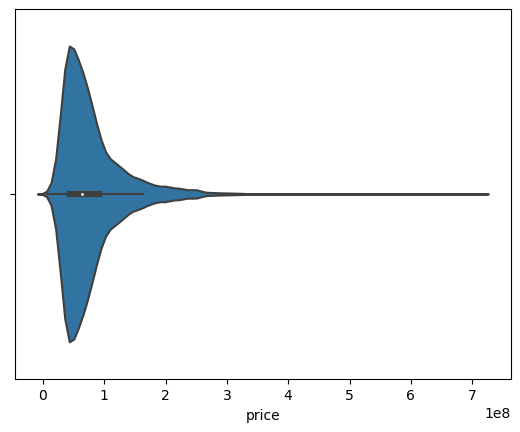

In [176]:
sns.violinplot(data=df, x='price')
plt.show()

## Droping outliers

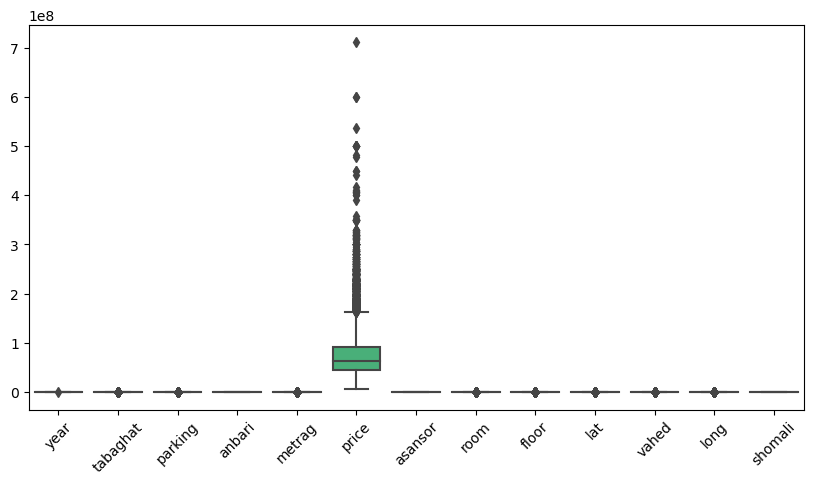

In [177]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.boxplot(data=df)
plt.show()

In [178]:
cols = ["price"]
Q1=df.quantile(0.2)
Q3=df.quantile(0.55)
IQR=Q3-Q1
df =df[ ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df.describe()

/tmp/ipykernel_8727/3429753807.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df =df[ ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
/tmp/ipykernel_8727/3429753807.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df =df[ ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


,year,tabaghat,parking,anbari,metrag,price,asansor,room,floor,lat,vahed,long,shomali
count,11623.000000,11623.000000,11623.000000,11623.000000,11623.000000,1.162300e+04,11623.000000,11623.000000,11623.000000,11623.000000,11623.000000,11623.000000,11623.000000
mean,1388.356534,5.206229,0.753678,0.789985,101.254581,5.842636e+07,0.672460,2.039835,2.974877,36.014357,4.267401,51.812902,0.443775
std,8.745452,2.868642,0.430887,0.407336,103.783299,2.104139e+07,0.469336,0.754186,2.133689,4.243657,2.578569,6.100047,0.496850
min,1360.000000,1.000000,0.000000,0.000000,21.000000,6.100000e+06,0.000000,0.000000,-2.000000,7.087240,1.000000,10.208330,0.000000
25%,1382.000000,4.000000,1.000000,1.000000,68.000000,4.146300e+07,0.000000,2.000000,2.000000,34.461310,3.000000,49.494770,0.000000
50%,1388.000000,5.000000,1.000000,1.000000,90.000000,5.590000e+07,1.000000,2.000000,3.000000,35.762247,4.000000,51.391736,0.000000
75%,1396.000000,5.000000,1.000000,1.000000,120.000000,7.410000e+07,1.000000,2.000000,4.000000,36.470180,5.000000,52.601500,1.000000
max,1401.000000,90.000000,1.000000,1.000000,10000.000000,1.083000e+08,1.000000,8.000000,31.000000,57.015630,36.000000,81.996090,1.000000


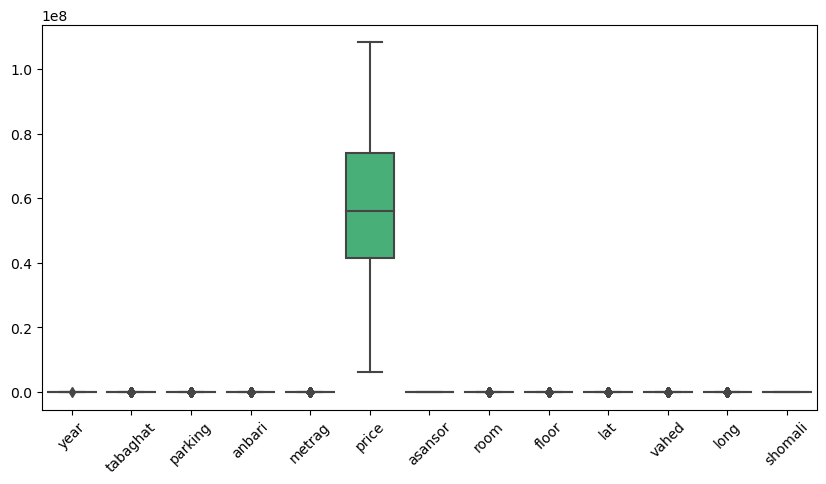

In [179]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.boxplot(data=df)
plt.show()

In [180]:
cols = ['metrag','room','floor','tabaghat']
Q1=df.quantile(0.2)
Q3=df.quantile(0.70)
IQR=Q3-Q1
df =df[ ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df.describe()

/tmp/ipykernel_8727/3523329320.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df =df[ ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
/tmp/ipykernel_8727/3523329320.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df =df[ ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


,year,tabaghat,parking,anbari,metrag,price,asansor,room,floor,lat,vahed,long,shomali
count,9819.000000,9819.000000,9819.000000,9819.000000,9819.000000,9.819000e+03,9819.000000,9819.00000,9819.000000,9819.000000,9819.000000,9819.000000,9819.000000
mean,1388.153682,4.520725,0.730217,0.806701,91.932274,5.644051e+07,0.640391,1.94419,2.656890,36.030145,3.859558,51.844013,0.452490
std,8.574557,0.754462,0.443870,0.394905,33.322727,2.033479e+07,0.479910,0.66390,1.425514,4.341688,1.260173,6.240273,0.497763
min,1362.000000,3.000000,0.000000,0.000000,21.000000,6.100000e+06,0.000000,0.00000,-2.000000,7.087240,1.000000,10.208330,0.000000
25%,1382.000000,4.000000,0.000000,1.000000,65.000000,4.000000e+07,0.000000,2.00000,1.000000,34.421180,3.000000,49.407290,0.000000
50%,1388.000000,5.000000,1.000000,1.000000,85.000000,5.402000e+07,1.000000,2.00000,3.000000,35.760025,4.000000,51.390957,0.000000
75%,1395.000000,5.000000,1.000000,1.000000,114.000000,7.040000e+07,1.000000,2.00000,4.000000,36.470180,5.000000,52.601500,1.000000
max,1401.000000,6.000000,1.000000,1.000000,191.000000,1.083000e+08,1.000000,3.00000,6.000000,57.015630,8.000000,81.996090,1.000000


In [181]:
df.shape

(9819, 13)

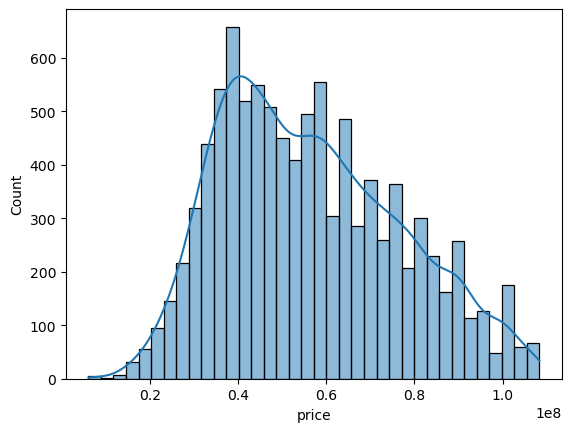

In [182]:
sns.histplot(df["price"], kde=True)
plt.show()

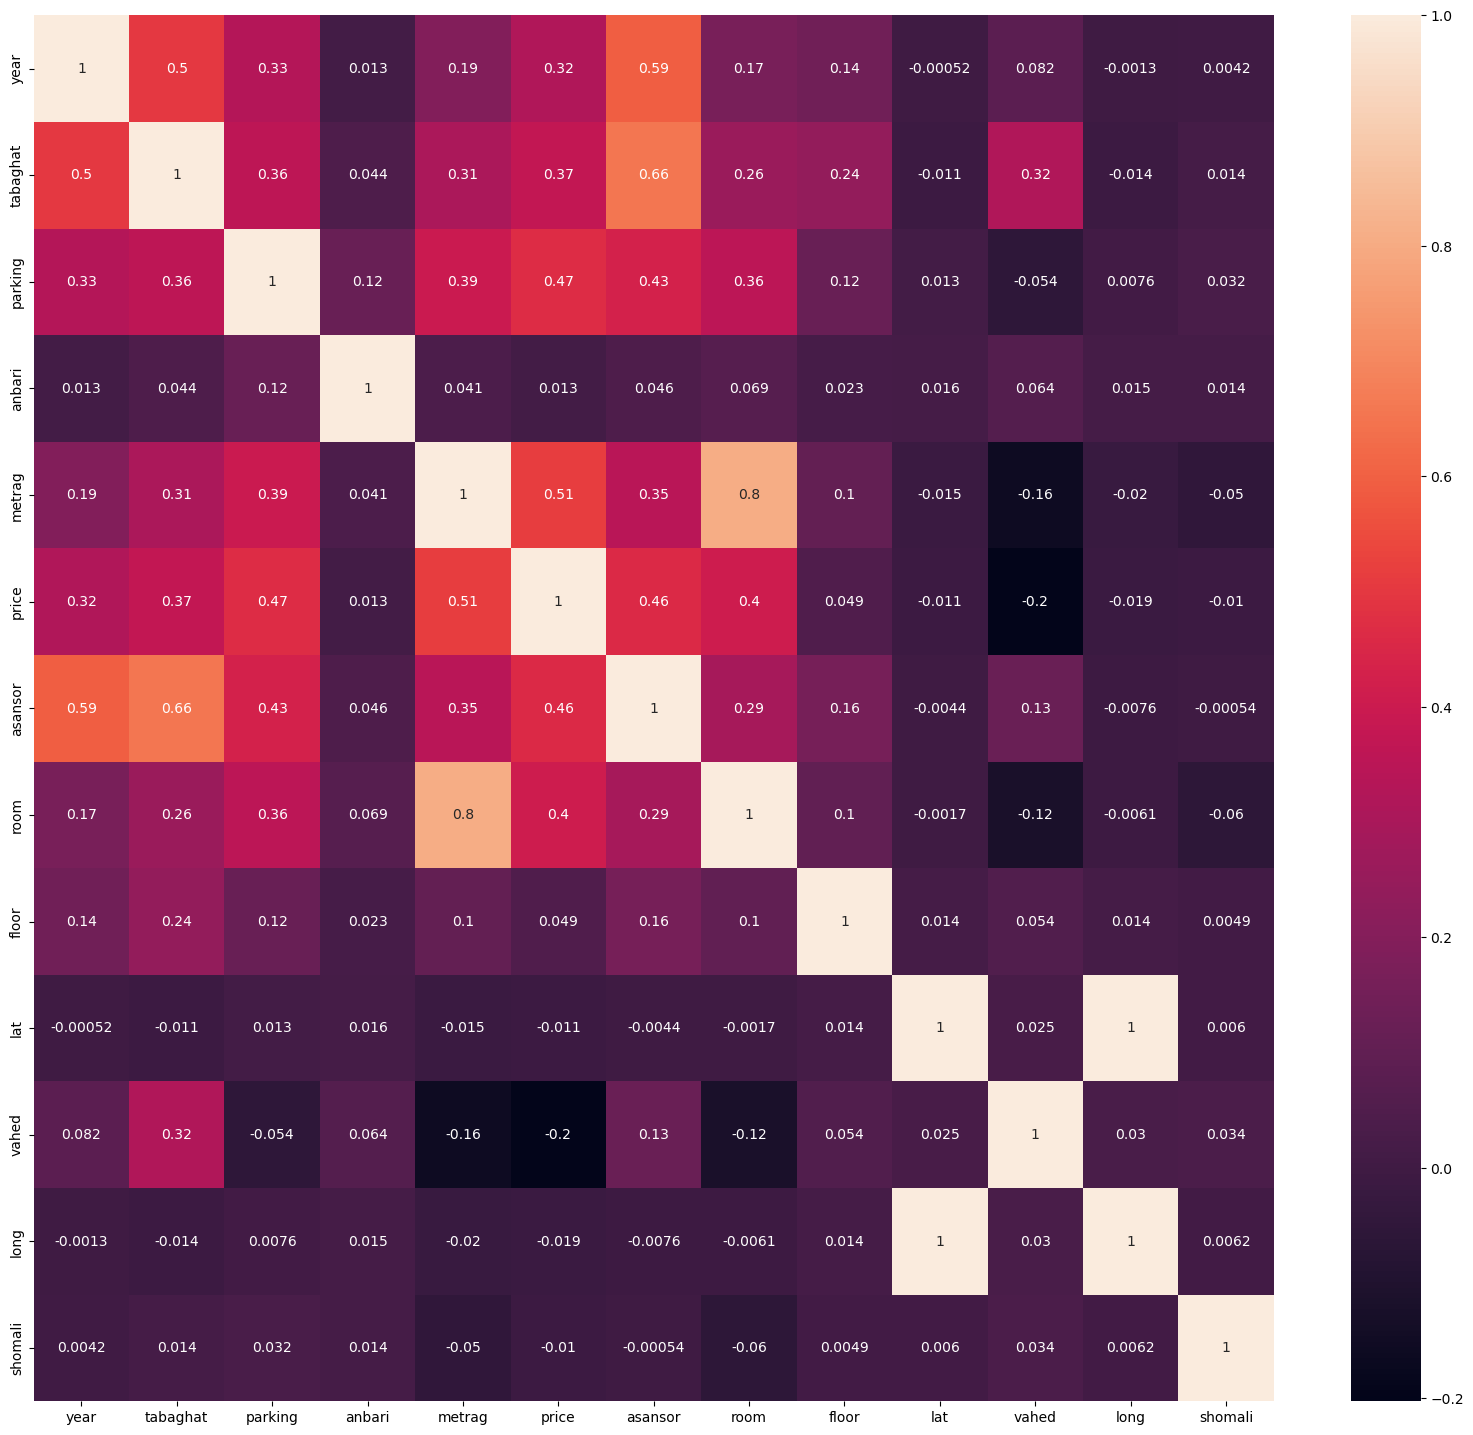

In [183]:
corr_date = df.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(corr_date,annot=True)
plt.show()

In [184]:
import hvplot.pandas

In [185]:
df.drop('price', axis=1).corrwith(df.price).hvplot.barh(
    width=600, height=400, 
    title="Correlation between Price and Numeric Features", 
    ylabel='Correlation', xlabel='Numerical Features',
)


:Bars   [index]   (0)

In [186]:
df=df.drop(['vahed'],axis=1)

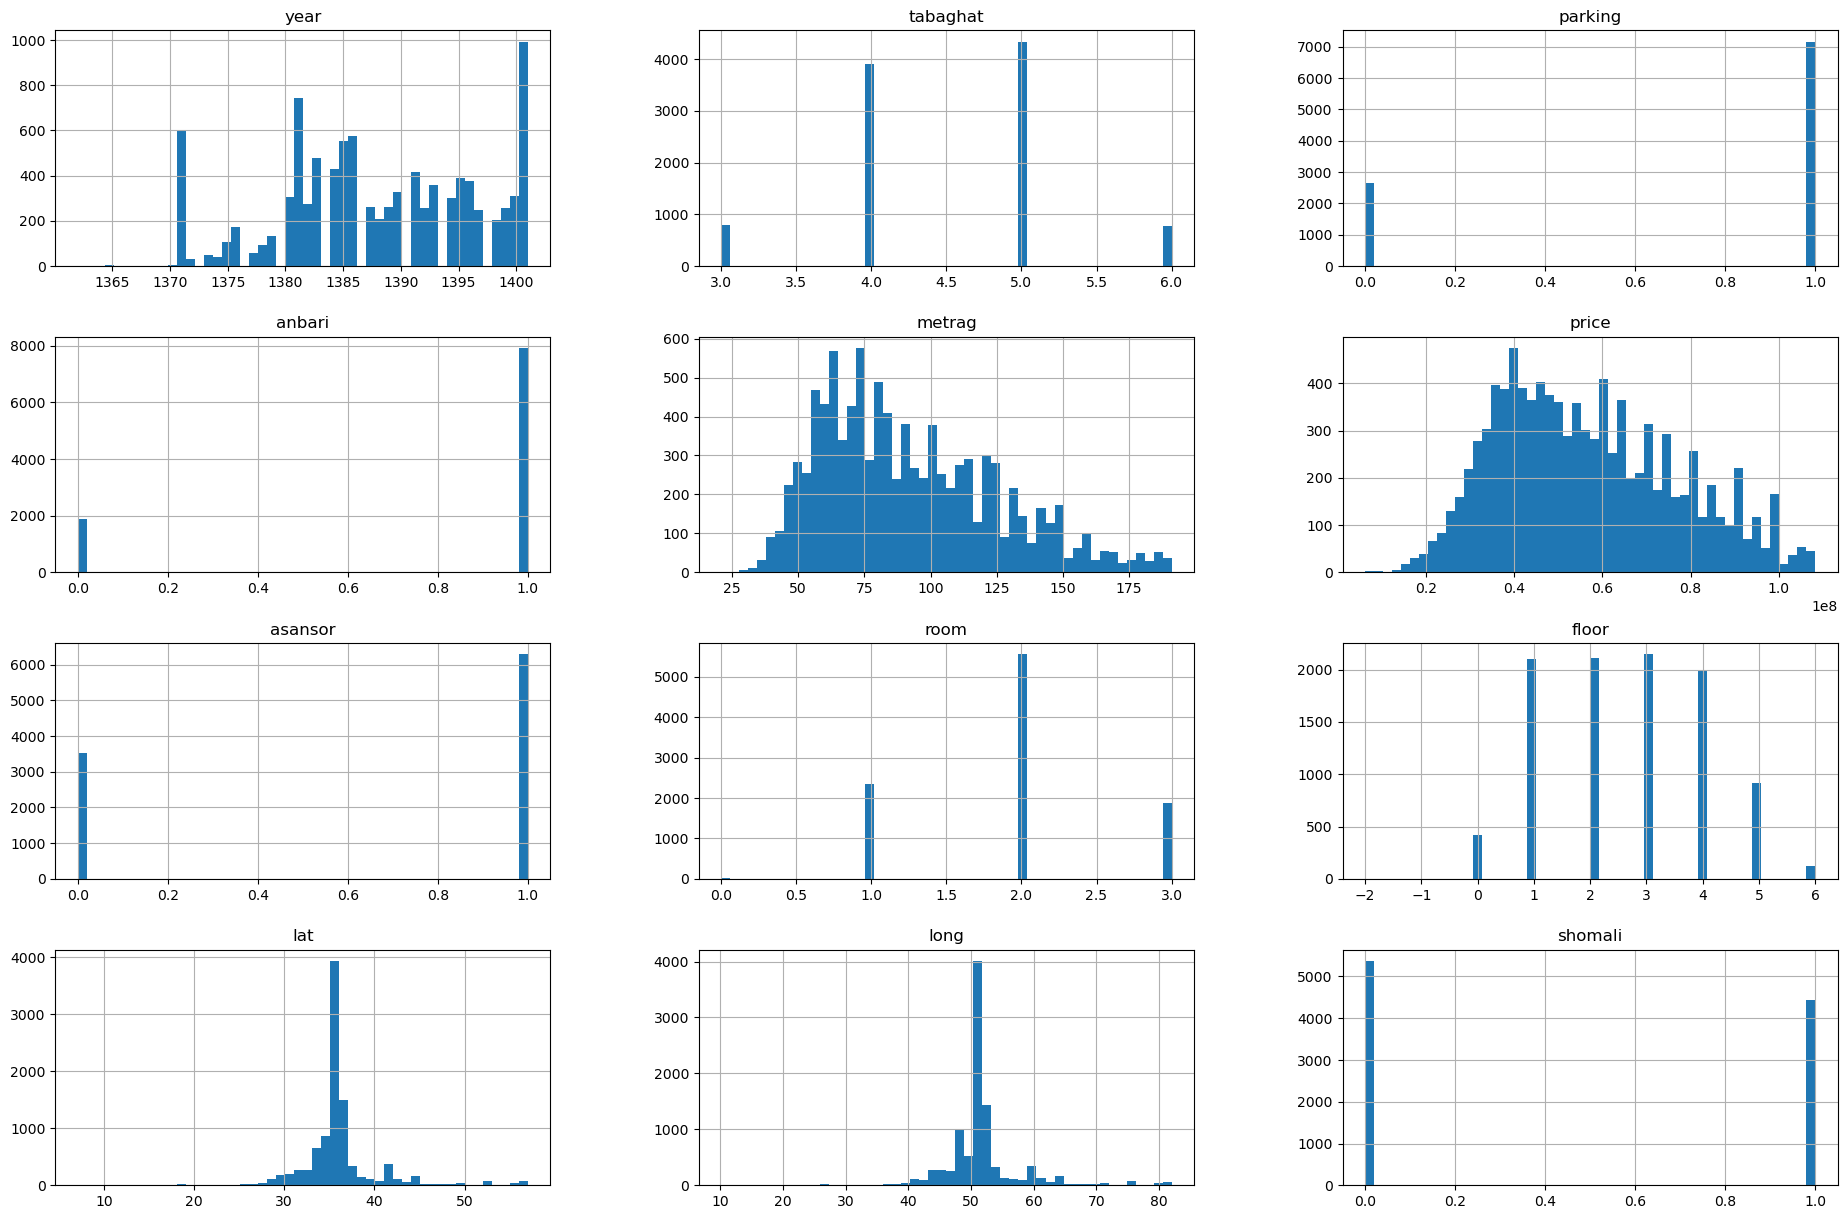

In [187]:
df.hist(bins=50, figsize=(23,15))
plt.show()

In [188]:
sns.set(font_scale=2)
sns.set_style('whitegrid')

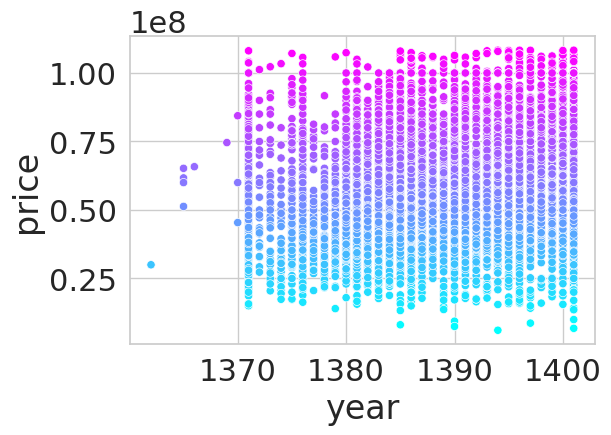

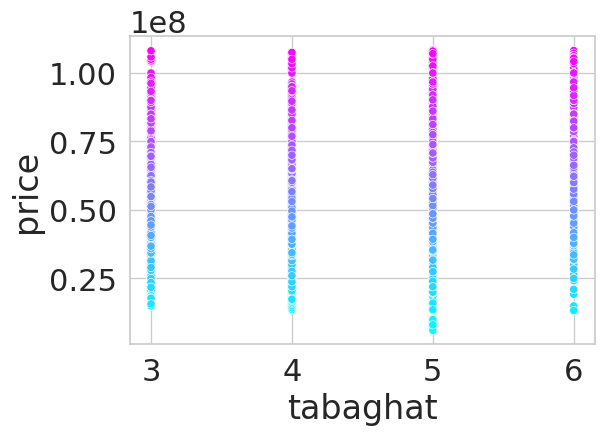

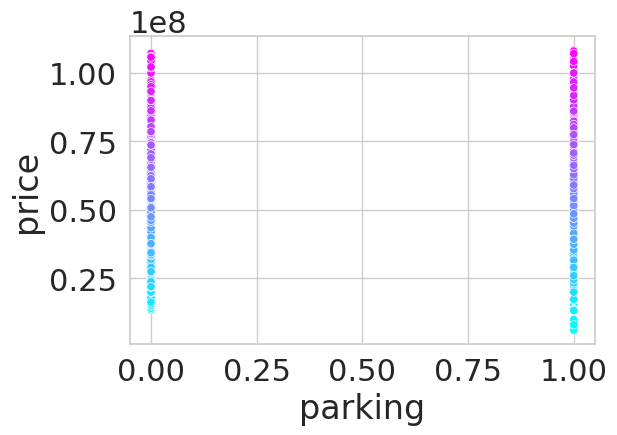

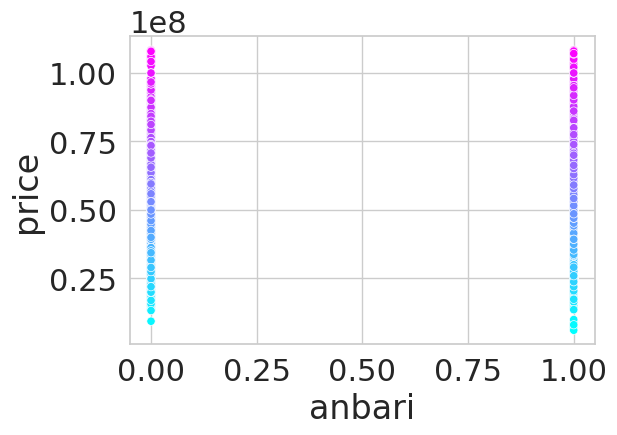

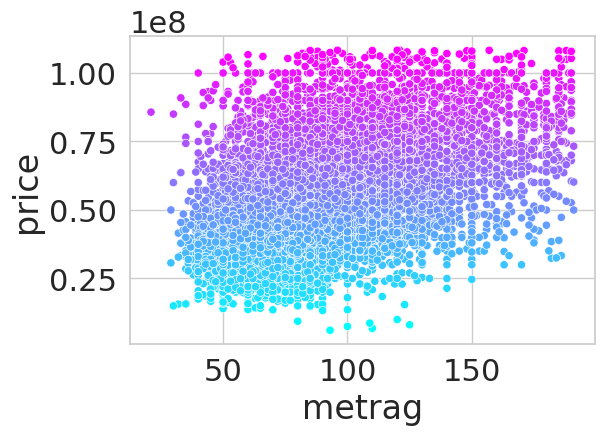

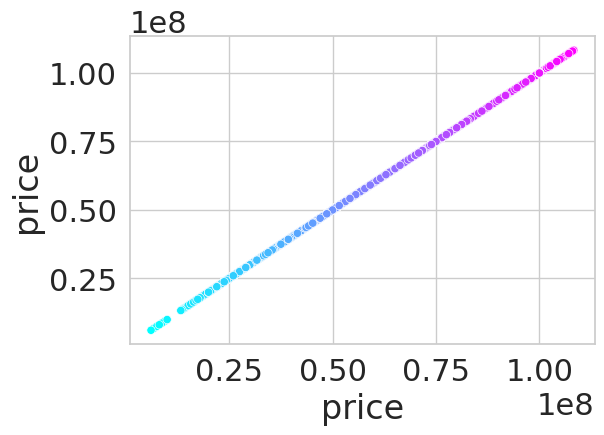

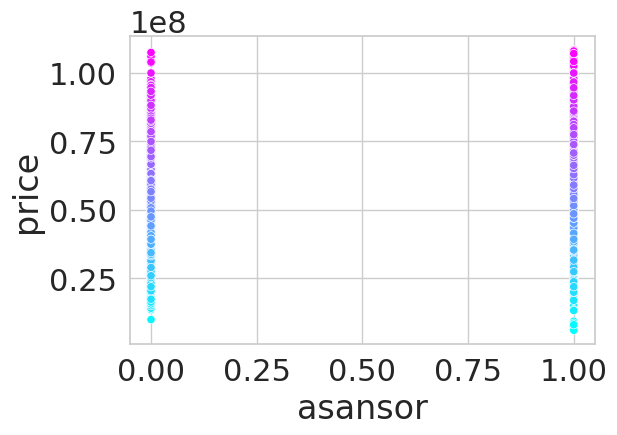

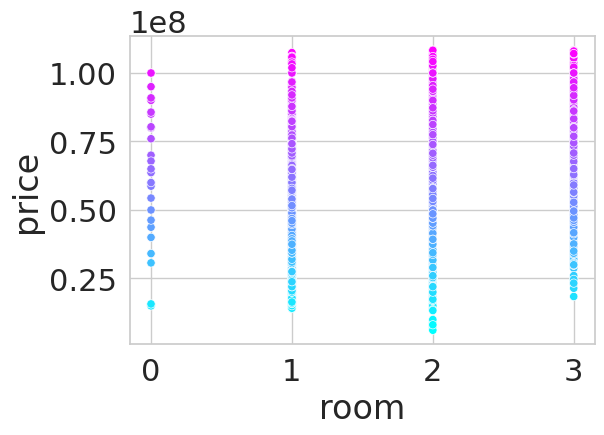

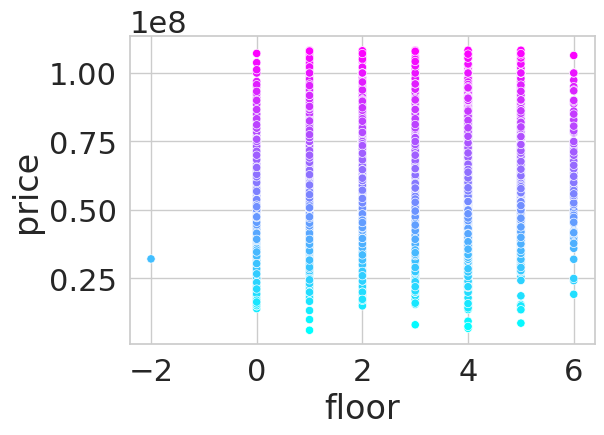

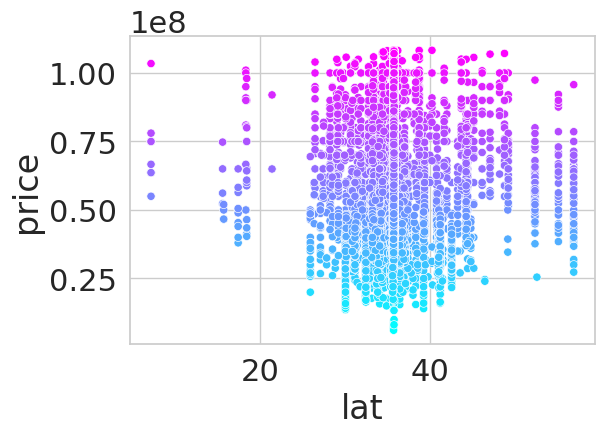

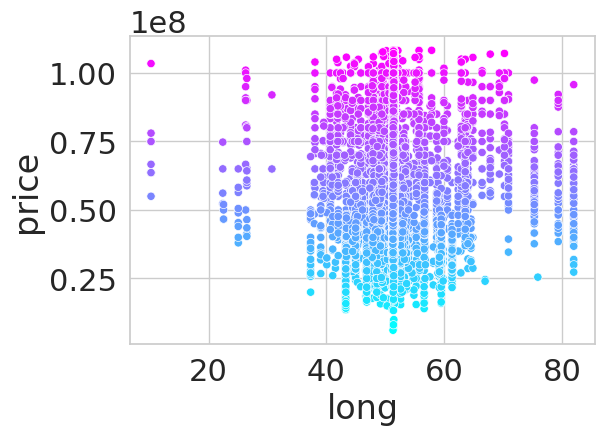

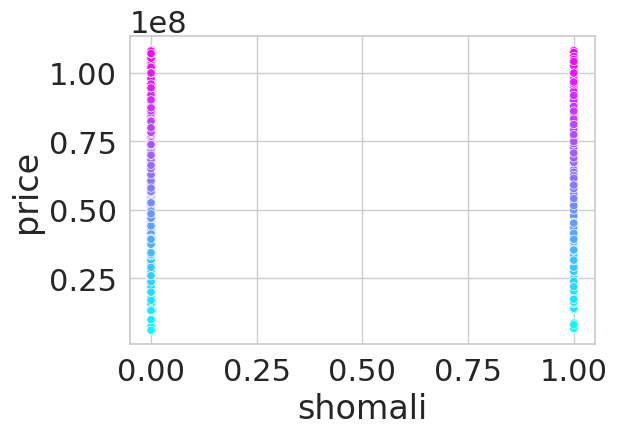

In [190]:
for feature in df.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=feature,y='price',
                    hue='price', palette='cool', legend=False)
    plt.show()

## Splitting the dataset into the Training set and Test set

In [191]:
X = df.drop(['price'],axis=1)
y = df.filter(['price'],axis=1)

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [193]:
from sklearn.preprocessing import StandardScaler


## Feature scaling with Pipeline

In [195]:
model = make_pipeline(preprocessing.StandardScaler(), LinearRegression())
model.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

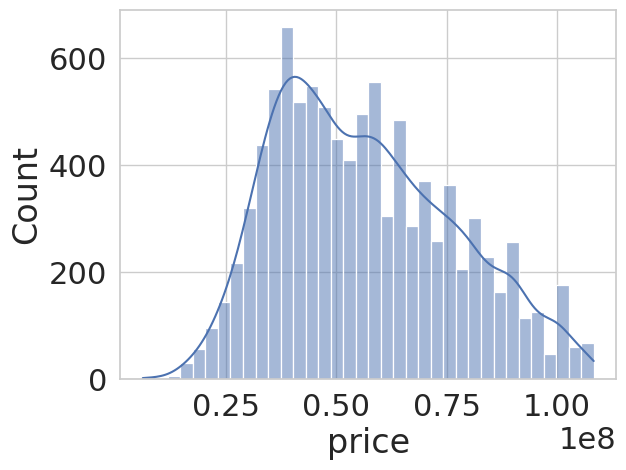

In [196]:
sns.histplot(df["price"], kde=True)
plt.show()

## Predicting the Test set results

In [197]:
y_predict= model.predict(X_test)

In [198]:
print("MSE (LinearRegression): ", metrics.mean_squared_error(y_test, y_predict))
print("R2_SCORE (LinearRegression): ", metrics.r2_score(y_test, y_predict))
print("MAPE (LinearRegression): ", metrics.mean_absolute_percentage_error(y_test, y_predict))
math.sqrt(metrics.mean_squared_error(y_test, y_predict)) / df["price"].mean()

MSE (LinearRegression):  212326768426700.72
R2_SCORE (LinearRegression):  0.5002127803229228
MAPE (LinearRegression):  0.2279495284732678


0.25817338864514316

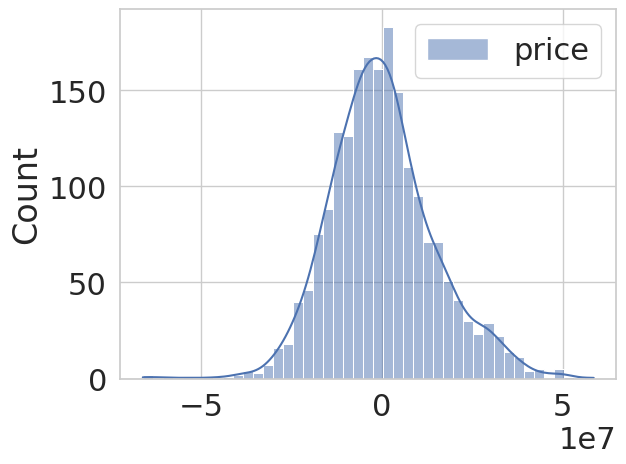

In [199]:
sns.histplot(y_test - y_predict, kde=True)
plt.show()

In [200]:
ridge_poly_model = make_pipeline(preprocessing.StandardScaler(), 
              preprocessing.PolynomialFeatures(degree=1, include_bias=False), 
              Ridge(alpha=0))
ridge_poly_model.fit(X_train, y_train)
y_predict_ridge_poly = ridge_poly_model.predict(X_test)

print("MSE (Ridge + Polynomial): ", metrics.mean_squared_error(y_test, y_predict_ridge_poly))
print("R2_SCORE (Ridge + Polynomial): ", metrics.r2_score(y_test, y_predict_ridge_poly))
print("MAPE (Ridge + Polynomial): ", metrics.mean_absolute_percentage_error(y_test, y_predict_ridge_poly))
math.sqrt(metrics.mean_squared_error(y_test, y_predict_ridge_poly)) / df["price"].mean()

MSE (Ridge + Polynomial):  212326768426700.6
R2_SCORE (Ridge + Polynomial):  0.5002127803229233
MAPE (Ridge + Polynomial):  0.2279495284732678


0.2581733886451431

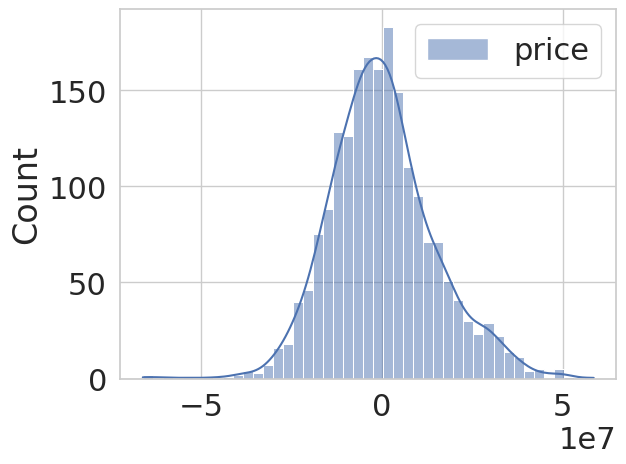

In [201]:
sns.histplot(y_test - y_predict, kde=True)
plt.show()

In [202]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


dt=make_pipeline(preprocessing.StandardScaler(), 
              DecisionTreeRegressor(max_depth=6))
dt.fit(X_train, y_train)
yhat = dt.predict(X_test)
r2_score(y_test, yhat), mean_absolute_error(y_test, y_predict), np.sqrt(mean_squared_error(y_test, y_predict))

(0.5046727949774215, 11169760.429525902, 14571436.73172624)